## Dependencies

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import cv2 as cv

In [2]:
from server.src.modules.dataProcessor import DataProcessor

## Load Data

In [7]:
dataProcessor = DataProcessor()

In [ ]:
(X_train,y_train),(X_test,y_test) = dataProcessor.load_data()

In [2]:
X_train = np.load('./server/data/np_data/X_train.npy')
X_test = np.load('./server/data/np_data/X_test.npy')
y_train = np.load('./server/data/np_data/y_train.npy')
y_test = np.load('./server/data/np_data/y_test.npy')

In [4]:
len(X_train)

36212

In [5]:
len(X_test)

17837

## Build The Model

### AASL V.0

In [8]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=164,kernel_size=(3,3),activation="relu",input_shape=(64,64,3)))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(filters=36,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32,activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 164)       4592      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 164)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       189056    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

### ResNet AASL

### VGG-16 AASL

## Train The Model

### AASL V.0

In [ ]:
model.fit(X_train,y_train,epochs=30)

### ResNet AASL

In [ ]:
model.fit(X_train,y_train,epochs=30)

### VGG-16 AASL

In [ ]:
model.fit(X_train,y_train,epochs=30)

## Load The Model

In [19]:
aasl_v0_model = tf.keras.models.load_model('./server/data/models/AASL_V.0/')

In [12]:
predictions = aasl_v0_model.predict(X_test)

558/558 [==============================] - 70s 125ms/step


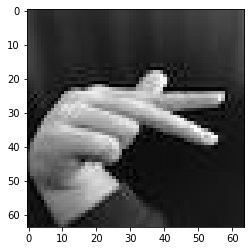

In [13]:
plt.imshow(X_test[0])

In [10]:
print(y_test[0])

9


In [ ]:
print(dataProcessor.decode(np.argmax(predictions[0])))

## Test The Model